In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

np.random.seed(42)

In [2]:
!pip install minisom

In [0]:
dt = pd.read_csv("dadosQ5.csv")

In [5]:
dt

,Expectativa de Vida,Educacao,PIB,Estabilidade Politica,Pais
0,0.88,0.99,0.91,1.10,Reino Unido
1,0.90,0.99,0.93,1.26,Australia
2,0.90,0.98,0.94,1.24,Canada
3,0.87,0.98,0.97,1.18,Estados Unidos
4,0.93,0.93,0.93,1.20,Japao
5,0.89,0.97,0.92,1.04,Franca
6,0.88,0.87,0.91,1.41,Cingapura
7,0.81,0.92,0.80,0.55,Argentina
8,0.82,0.92,0.75,1.05,Uruguai
9,0.85,0.90,0.64,0.70,Cuba


In [6]:
dt.describe()

,Expectativa de Vida,Educacao,PIB,Estabilidade Politica
count,21.000000,21.000000,21.000000,21.000000
mean,0.688095,0.749524,0.677619,0.187619
std,0.240263,0.249489,0.229606,1.062525
min,0.230000,0.330000,0.270000,-1.980000
25%,0.470000,0.580000,0.510000,-0.680000
50%,0.770000,0.850000,0.690000,0.470000
75%,0.880000,0.930000,0.910000,1.100000
max,0.930000,0.990000,0.970000,1.410000


In [7]:
x_train = dt[['Expectativa de Vida','Educacao','PIB', 'Estabilidade Politica']].values
y_train = dt['Pais'].values
print(x_train)
print(y_train)

[[ 0.88  0.99  0.91  1.1 ]
 [ 0.9   0.99  0.93  1.26]
 [ 0.9   0.98  0.94  1.24]
 [ 0.87  0.98  0.97  1.18]
 [ 0.93  0.93  0.93  1.2 ]
 [ 0.89  0.97  0.92  1.04]
 [ 0.88  0.87  0.91  1.41]
 [ 0.81  0.92  0.8   0.55]
 [ 0.82  0.92  0.75  1.05]
 [ 0.85  0.9   0.64  0.7 ]
 [ 0.77  0.85  0.69 -1.36]
 [ 0.71  0.83  0.72  0.47]
 [ 0.75  0.83  0.63 -0.87]
 [ 0.7   0.62  0.6   0.21]
 [ 0.44  0.58  0.37 -1.36]
 [ 0.47  0.37  0.45 -0.68]
 [ 0.23  0.33  0.27 -1.26]
 [ 0.34  0.36  0.51 -1.98]
 [ 0.31  0.35  0.32 -0.55]
 [ 0.24  0.37  0.36  0.2 ]
 [ 0.76  0.8   0.61  0.39]]
['Reino Unido' 'Australia' 'Canada' 'Estados Unidos' 'Japao' 'Franca'
 'Cingapura' 'Argentina' 'Uruguai' 'Cuba' 'Colombia' 'Brasil' 'Paraguai'
 'Egito' 'Nigeria' 'Senegal' 'Serra Leoa' 'Angola' 'Etiopia' 'Mocambique'
 'China']


In [0]:
## SOM
from minisom import MiniSom    


In [9]:
dim = 7
som = MiniSom(dim, dim, 4, neighborhood_function='gaussian', sigma=2, random_seed=42) # initialization
#som.random_weights_init(x_train)
som.random_weights_init(x_train)
#som.train_random(x_train, 1000) # trains the SOM
som.train_batch(x_train, 1000, verbose=True) # trains the SOM

 [ 1000 / 1000 ] 100% - 0.00061 it/s - quantization error: 0.1204278233531915


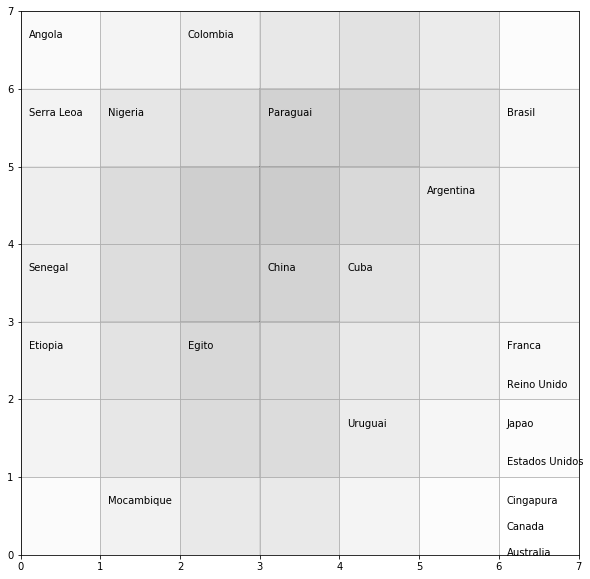

In [10]:
plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
#plt.pcolor(som.distance_map().T, cmap='Greys')  # plotting the distance map as background
#plt.colorbar()

country_map = som.labels_map(x_train, y_train)

for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, c, fontsize=10, color='k')

plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(dim+1))
plt.yticks(np.arange(dim+1))
plt.grid()
plt.show()


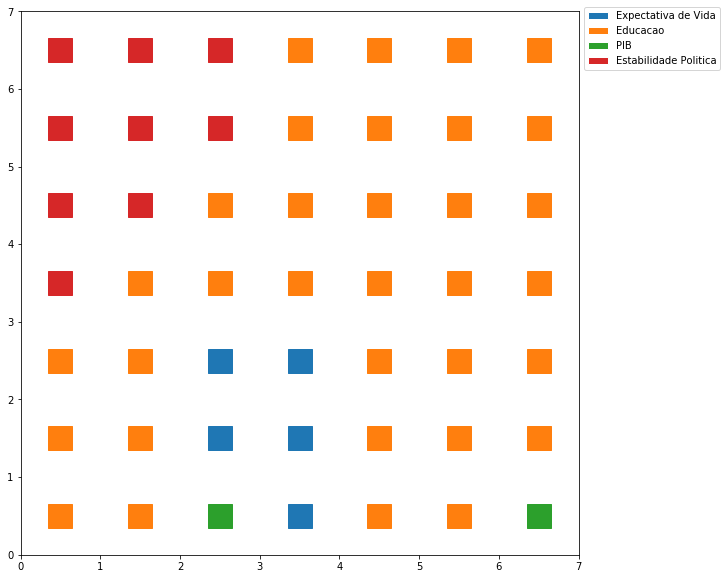

In [11]:
feature_names = ['Expectativa de Vida','Educacao','PIB', 'Estabilidade Politica']

W = som.get_weights()
Z = np.zeros((dim, dim))
plt.figure(figsize=(10, 10))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, dim])
plt.ylim([0, dim])
plt.show()


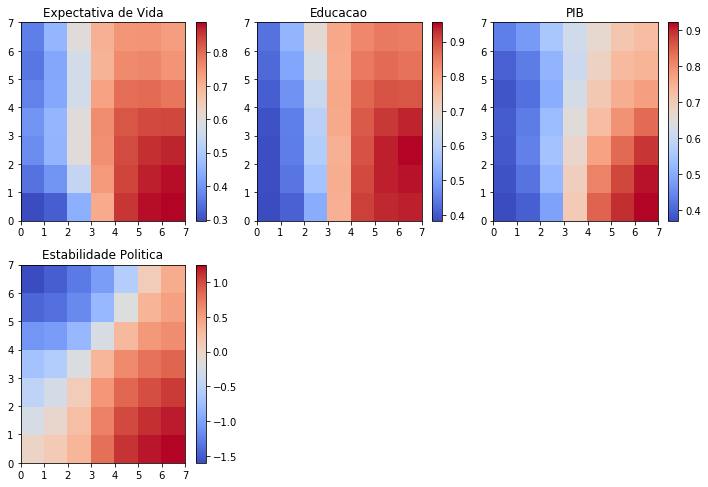

In [12]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(dim+1))
    plt.yticks(np.arange(dim+1))
plt.tight_layout()
plt.show()